In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

#Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
#Loading the dataset
stock_data = pd.read_csv('NFLX.csv', low_memory = False)

In [3]:
#Displaying the first few rows of the dataset
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
#Displaying the number of rows and columns in the dataset
stock_data.shape

(5044, 7)

In [5]:
#Understanding the data types of the columns
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
#Checking for missing values in the dataset
stock_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#Checking for duplicate rows in the dataset
stock_data.duplicated().sum()

0

In [8]:
#Summary statistics of the dataset
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [9]:
#Correcting the data type of the 'Date' column
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
#We are considering the close price of the stock for our analysis
data = stock_data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date']).dt.date
data.set_index('Date', inplace = True)
data.head()

/var/folders/7m/44q9fvz92g78pr35vq_tm5h80000gn/T/ipykernel_10003/3480241316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date']).dt.date


,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429


In [11]:
data.index

Index([2002-05-23, 2002-05-24, 2002-05-28, 2002-05-29, 2002-05-30, 2002-05-31,
       2002-06-03, 2002-06-04, 2002-06-05, 2002-06-06,
       ...
       2022-05-20, 2022-05-23, 2022-05-24, 2022-05-25, 2022-05-26, 2022-05-27,
       2022-05-31, 2022-06-01, 2022-06-02, 2022-06-03],
      dtype='object', name='Date', length=5044)

In [12]:
# Check the minimum and maximum date
print(data.index.min())
print(data.index.max())

2002-05-23
2022-06-03


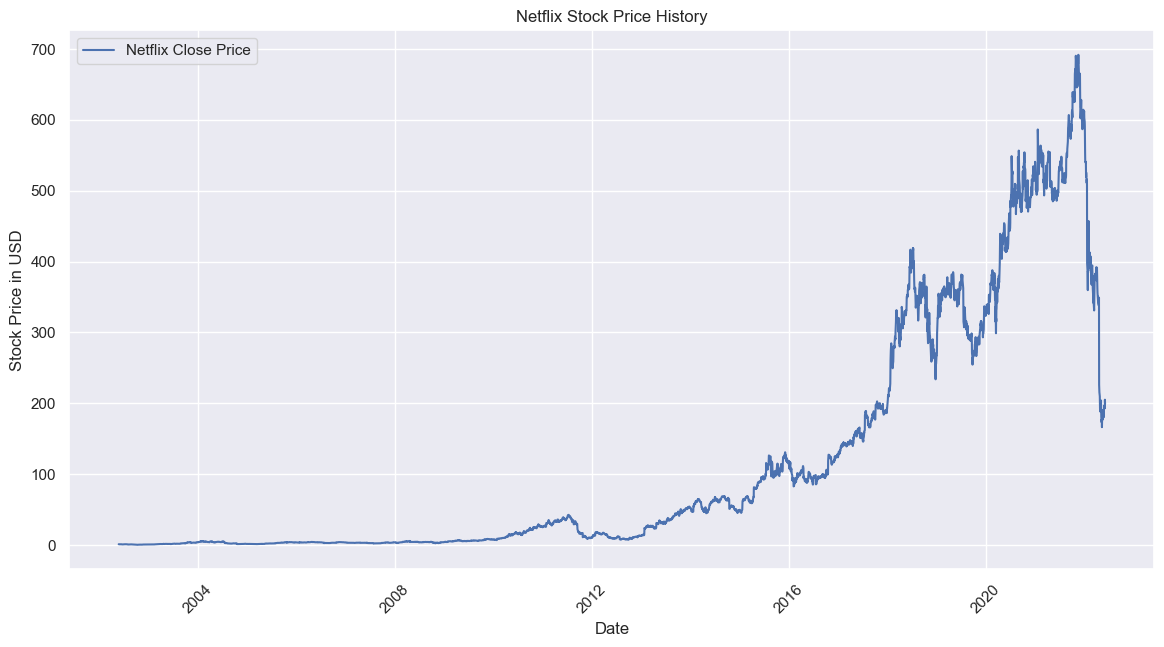

In [13]:
sns.set(style="darkgrid")  # Set a grid background style

# Plot the time series with seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x=data.index, y=data['Close'], label='Netflix Close Price')

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price in USD')
plt.title('Netflix Stock Price History')
plt.legend()

# Show the plot
plt.show()

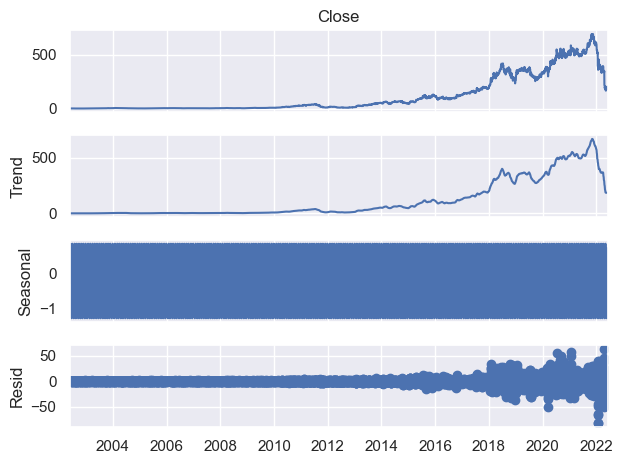

In [14]:
#Time Series Decomposition
#data.set_index('Date', inplace = True)
result = seasonal_decompose(x = data['Close'], model = 'additive', period = 21)
result.plot()
plt.show()

### Interpretations from the Seasonal Decomposition of the time series

- During the early stages, Netflix was transitioning from a DVD rental service to a streaming services with relatively modest growth. In 2013, the company began expanding its streaming services, investing heavily in original content (House of Cards) which contributes to the beginning of its rapid growth. During the COVID-19 pandemic (2020) streaming services like Netflix saw a surge in demand which attributes to a significant spike in the stock price. After the pandemic boom, the sharp decline in late 2021 reflects both market-wide corrections and company-specific issues, such as slowing subscriber growth and increased competition in the streaming industry.

- The sasonal component appears to be flat, which suggests that there is no strong seasonal pattern in the data. The lack of seasonality suggests the stock prices are more driven by news, fundementals and market sentiment rather than seasonal cycles.
- The increasing variance in the residuals, particularly after 2020 indicates the stock became more volatile in the later years. This volatility can be attributes to some key factors:
    - The streaming industry became more competitive with the arrival of platforms like Disney+, HBO Max, and others, creating uncertainity about Netflix's long term growth potential.
    - By 2021, Netflix faced challenges with subscriber growth, especially in saturated markets like North America which led to investor concerns
    - Broader market volitility, especially during the COVID-19 pandemic, likely contributed to increasing the noise, as investor sentiment fluctuated based on economic recovery, inflation concerns, and intrest rate hikes by central banks.

In [15]:
#Checking for stationarity
result_adf = adfuller(data['Close'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])

ADF Statistic: -1.2470207311260353
p-value: 0.6530488146407218


Since the p-value is greater than 0.05, the data is not stationary and we need to take the first difference to remove the trend.

In [16]:
data['Close_first_diff'] = data['Close'] - data['Close'].shift(1)
data.dropna(inplace = True)
data.head()


/var/folders/7m/44q9fvz92g78pr35vq_tm5h80000gn/T/ipykernel_10003/925721330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close_first_diff'] = data['Close'] - data['Close'].shift(1)
/var/folders/7m/44q9fvz92g78pr35vq_tm5h80000gn/T/ipykernel_10003/925721330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


,Close,Close_first_diff
Date,,
2002-05-24,1.210000,0.013571
2002-05-28,1.157143,-0.052857
2002-05-29,1.103571,-0.053572
2002-05-30,1.071429,-0.032142
2002-05-31,1.076429,0.005000


In [17]:
#Check the stationarity of the first difference
result_adf_diff = adfuller(data['Close_first_diff'])
print('ADF Statistic:', result_adf_diff[0])
print('p-value:', result_adf_diff[1])

ADF Statistic: -10.662460987641165
p-value: 4.371659316899204e-19


The p-value for the first differenced time series is much lower than 0.05, indicating the time series is stationary.

<Figure size 2000x900 with 0 Axes>

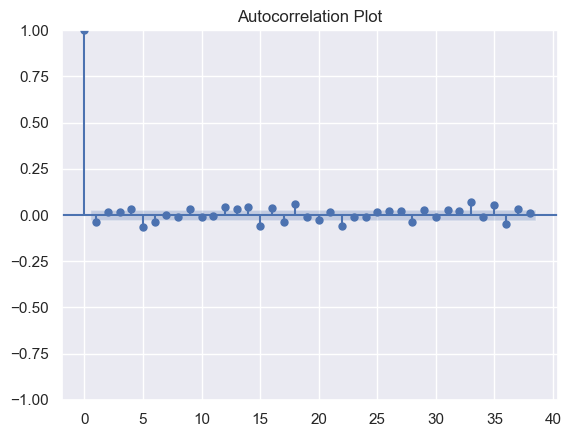

<Figure size 2000x900 with 0 Axes>

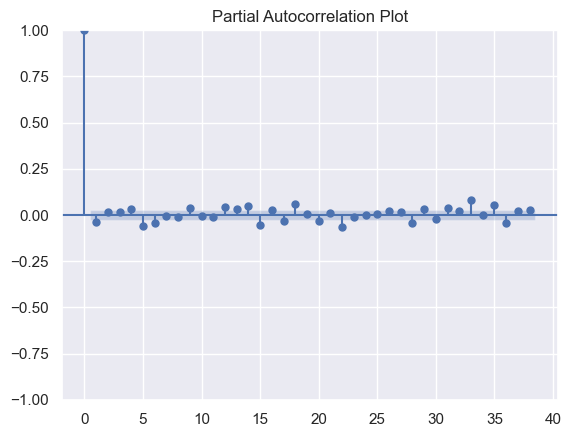

In [18]:
#Plotting the ACF and PACF plots
plt.figure(figsize=(20, 9))
plot_acf(data['Close_first_diff'])
plt.title('Autocorrelation Plot')
plt.show()

plt.figure(figsize=(20, 9))
plot_pacf(data['Close_first_diff'])
plt.title('Partial Autocorrelation Plot')
plt.show()

Based on the ACF and PACF plots, we have determined that the best model is ARIMA (1, 1, 1).

### Model Development

In [19]:
#Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data['Close_first_diff'][:train_size], data['Close_first_diff'][train_size:]


print('Training Set:', train.shape)
print('Testing Set:', test.shape)

Training Set: (4034,)
Testing Set: (1009,)


In [20]:
train.head()

Date
2002-05-24    0.013571
2002-05-28   -0.052857
2002-05-29   -0.053572
2002-05-30   -0.032142
2002-05-31    0.005000
Name: Close_first_diff, dtype: float64

In [21]:
#Building the ARIMA model
model = ARIMA(train, order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Close_first_diff   No. Observations:                 4034
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8235.329
Date:                Mon, 07 Oct 2024   AIC                          16476.657
Time:                        14:08:30   BIC                          16495.564
Sample:                             0   HQIC                         16483.356
                               - 4034                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0227      0.004      5.064      0.000       0.014       0.031
ma.L1         -0.9950      0.001  -1500.964      0.000      -0.996      -0.994
sigma2         3.4728      0.016    215.584      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Model Diagnosis

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


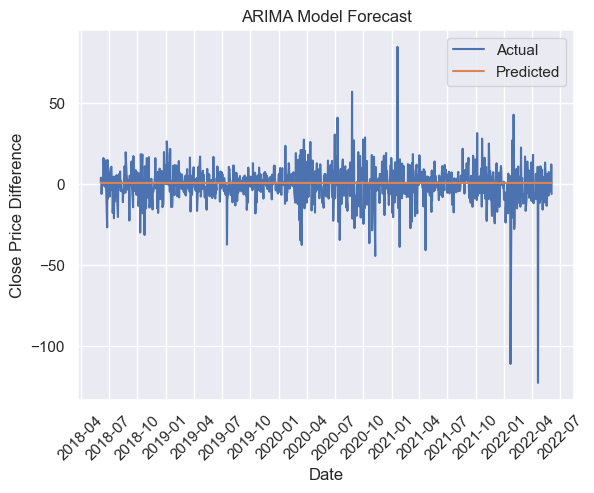

In [22]:
# Forecasting on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')
predictions.index = test.index

# Plotting the predictions vs actual test data
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set major locator to display every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Year-Month format

plt.ylabel('Close Price Difference')
plt.legend()
plt.show()

In [23]:
predictions

Date
2018-06-04    0.917856
2018-06-05    0.749726
2018-06-06    0.745913
2018-06-07    0.745826
2018-06-08    0.745824
                ...   
2022-05-27    0.745824
2022-05-31    0.745824
2022-06-01    0.745824
2022-06-02    0.745824
2022-06-03    0.745824
Name: predicted_mean, Length: 1009, dtype: float64

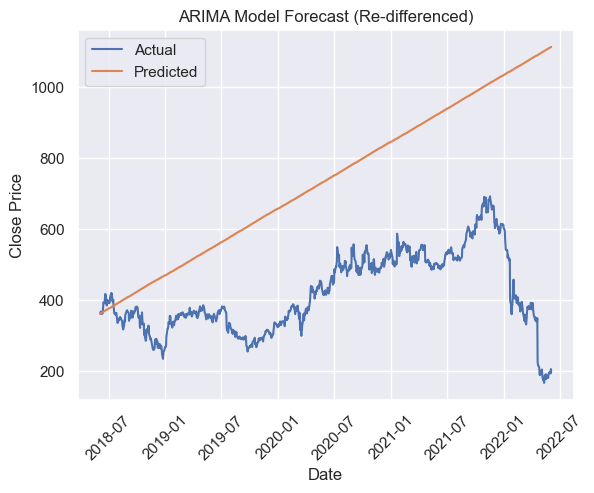

In [24]:
predictions_cumsum = predictions.cumsum()  # Reverse cumulative sum to undo differencing
predictions_reversed = predictions_cumsum + data['Close'].iloc[train_size - 1]  # Adding the last value from training to restore original scale

# Plotting the predictions vs actual test data
plt.plot(data['Close'][len(train):], label='Actual')  # Original test set (Close price)
plt.plot(predictions_reversed, label='Predicted')  # Re-differenced predictions

plt.title('ARIMA Model Forecast (Re-differenced)')
plt.xlabel('Date')

# Rotate x-axis labels
plt.xticks(rotation=45)



plt.ylabel('Close Price')
plt.legend()
plt.show()

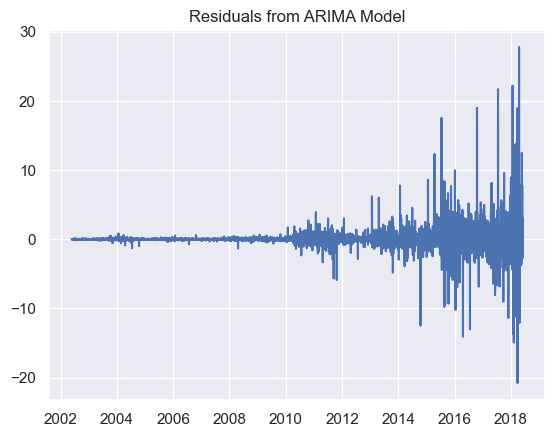

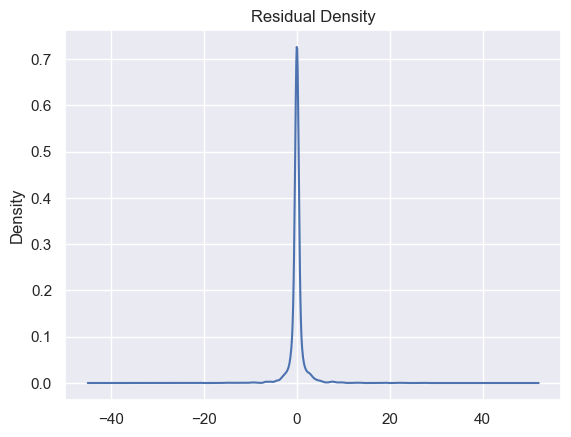

In [25]:
#Residual Analysis
residuals = model_fit.resid
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Check for normality with a histogram
residuals.plot(kind='kde')
plt.title('Residual Density')
plt.show()

In [26]:
#Ljung-Box test for autocorrelation
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test) # If p-value is less than 0.05, then the residuals are not white noise

       lb_stat     lb_pvalue
10  120.724446  3.606778e-21


Based on out diagnosis of the ARIMA (1, 1, 1) model, the residuals show increasing volatility over time, suggesting that the ARIMA model struggles to capture the volatility in the stock price, particularly after 2014.

The residual distribution has fat tails, indicating the presense of large errors in the data and that the model might not be able to capture the extreme price fluctuations effectively.

The residuals are not normally distributed which violates the key assumption of the ARIMA model suggesting that we need a better model which can better account for changing variance like the GARCH or VARMAX models.

To implement an effective model, we have to consider the fact that the COVID-19 pandemic took place in 2020 which affected the stock price of Netflix. As more people were isolating, Netflix acquired subscribers at a faster rate, leading to a rapid rise in the stock price.

However, post-pandemic, market corrections became apparent as lockdowns ended and consumer behavior shifted. Factors like disposable income, consumer confidence, inflation, and rising interest rates have since played a significant role in influencing Netflix's stock price. Incorporating these macroeconomic factors, along with segmenting the data into pre- and post-COVID periods, allows for a more accurate and robust model. Additionally, adjusting for market volatility and using techniques to account for structural breaks will help capture the shifts in both the company's growth and stock performance effectively.